In [1]:
!gdown --id 1pvd722U6Z5eznce8ty-KPEab50saOtpn
!gdown --id 1wgb9C_An9hJ2qD-k6RuJ6a6jk_y1hggL

Downloading...
From: https://drive.google.com/uc?id=1pvd722U6Z5eznce8ty-KPEab50saOtpn
To: /content/UNSW_2018_IoT_Botnet_Final_10_best_Testing.csv
92.3MB [00:00, 160MB/s]
Downloading...
From: https://drive.google.com/uc?id=1wgb9C_An9hJ2qD-k6RuJ6a6jk_y1hggL
To: /content/UNSW_2018_IoT_Botnet_Final_10_best_Training.csv
369MB [00:02, 144MB/s]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df_test = pd.read_csv('UNSW_2018_IoT_Botnet_Final_10_best_Testing.csv')
df_train = pd.read_csv('UNSW_2018_IoT_Botnet_Final_10_best_Training.csv')

In [3]:
df_train['category'].value_counts()

DDoS              1541315
DoS               1320148
Reconnaissance      72919
Normal                370
Theft                  65
Name: category, dtype: int64

In [4]:
df_train.groupby(['category'])['subcategory'].value_counts()

category        subcategory      
DDoS            TCP                  782228
                UDP                  758301
                HTTP                    786
DoS             UDP                  826349
                TCP                  492615
                HTTP                   1184
Normal          Normal                  370
Reconnaissance  Service_Scan          58626
                OS_Fingerprint        14293
Theft           Keylogging               59
                Data_Exfiltration         6
Name: subcategory, dtype: int64

In [5]:
df_test.groupby(['category'])['subcategory'].value_counts()

category        subcategory   
DDoS            TCP               195152
                UDP               189954
                HTTP                 203
DoS             UDP               206626
                TCP               123185
                HTTP                 301
Normal          Normal               107
Reconnaissance  Service_Scan       14542
                OS_Fingerprint      3621
Theft           Keylogging            14
Name: subcategory, dtype: int64

In [6]:
df_train['target'] = df_train['category'] + "_" + df_train['subcategory']
df_test['target'] = df_test['category'] + "_" + df_test['subcategory']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


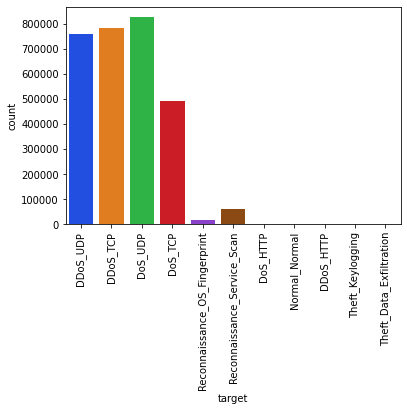

In [7]:
plt.xticks(rotation=90)
sns.countplot(df_train['target'],palette='bright')


In [8]:
indexNames = df_train[df_train['subcategory']=='Data_Exfiltration'].index
df_train.drop(indexNames , inplace=True)
indexNames = df_test[df_test['subcategory']=='Data_Exfiltration'].index
df_test.drop(indexNames , inplace=True)

df_train.drop(["pkSeqID","seq"], axis=1, inplace=True)
df_test.drop(["pkSeqID","seq"], axis=1, inplace=True)

In [9]:
df_train[df_train['category']=='Normal']

,proto,saddr,sport,daddr,dport,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory,target
3377,tcp,192.168.100.5,0,192.168.100.3,0,0.235357,7,0.598172,2,4.898582,7,0.000000,10.932437,4.999866,0,Normal,Normal,Normal_Normal
7683,udp,192.168.100.150,46295,192.168.217.2,53,0.000000,11,0.000000,4,0.000000,20,0.000000,0.400001,0.000000,0,Normal,Normal,Normal_Normal
8844,tcp,192.168.100.3,80,192.168.100.55,8080,0.228494,20,0.768694,2,4.947914,2,17.633553,17.634146,4.999863,0,Normal,Normal,Normal_Normal
10110,udp,192.168.100.147,38275,192.168.217.2,53,0.000000,18,0.000000,4,0.000000,18,0.000000,0.399866,0.000000,0,Normal,Normal,Normal_Normal
16479,udp,192.168.100.150,56155,255.255.255.255,3289,0.000000,14,0.000000,4,0.000000,2,0.000000,0.000000,0.000000,0,Normal,Normal,Normal_Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2896922,udp,192.168.100.3,60946,192.31.80.30,53,0.000000,23,0.278547,2,0.278547,1,0.000000,0.000000,0.278547,0,Normal,Normal,Normal_Normal
2907572,ipv6-icmp,fe80::250:56ff:febe:c038,133,ff02::2,0,0.000000,1,0.000000,8,0.000000,3,0.000000,0.000000,0.000000,0,Normal,Normal,Normal_Normal
2912220,udp,192.168.100.4,60001,192.168.100.1,53,0.323125,7,0.000000,2,0.161776,4,0.555538,0.644334,0.808025,0,Normal,Normal,Normal_Normal
2917520,udp,192.168.100.148,41735,8.8.8.8,53,0.000000,20,0.007598,2,0.007598,15,0.000000,0.000000,0.007598,0,Normal,Normal,Normal_Normal


In [10]:
df_train['sport'].value_counts()

0x0303    7156
80        3220
1822       878
60541      869
1216       868
          ... 
7813        31
39305       30
18992       30
0x000d      10
0x0011       8
Name: sport, Length: 65541, dtype: int64

In [11]:
check='0x'
s_res = set([i for i in df_train['sport'] if i.startswith(check)])
s_res

{'0x0008', '0x000d', '0x0011', '0x0303'}

In [12]:
df_train['sport']=df_train['sport'].replace(['0x0303'],'771') 
df_train['sport']=df_train['sport'].replace(['0x0011'],'17')
df_train['sport']=df_train['sport'].replace(['0x000d'],'13')
df_train['sport']=df_train['sport'].replace(['0x0008'],'8')

df_test['sport']=df_test['sport'].replace(['0x0303'],'771') 
df_test['sport']=df_test['sport'].replace(['0x0011'],'17')
df_test['sport']=df_test['sport'].replace(['0x000d'],'13')
df_test['sport']=df_test['sport'].replace(['0x0008'],'8')

df_train["sport"] = df_train["sport"].astype(str).astype(int)
df_test["sport"] = df_test["sport"].astype(str).astype(int)

In [13]:
check='0x'
d_res = set([i for i in df_train['dport'] if i.startswith(check)])
print(len(d_res))

1062


In [14]:
df_train["dport"] = df_train["dport"].apply(lambda x: int(x,16) if len(x)>1 and x[1]=="x" else int(x))
df_test["dport"] = df_test["dport"].apply(lambda x: int(x,16) if len(x)>1 and x[1]=="x" else int(x))

In [15]:
df_train['target'].value_counts()

DoS_UDP                          826349
DDoS_TCP                         782228
DDoS_UDP                         758301
DoS_TCP                          492615
Reconnaissance_Service_Scan       58626
Reconnaissance_OS_Fingerprint     14293
DoS_HTTP                           1184
DDoS_HTTP                           786
Normal_Normal                       370
Theft_Keylogging                     59
Name: target, dtype: int64

In [16]:
indexNames = df_train[df_train['dport'] == -1].index
df_train.drop(indexNames, inplace=True)
indexNames = df_test[df_test['dport'] == -1].index
df_test.drop(indexNames, inplace=True)
df_train.drop(["category","subcategory"], axis=1, inplace=True)
df_test.drop(["category","subcategory"], axis=1, inplace=True)

In [17]:
df_train

,proto,saddr,sport,daddr,dport,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,target
0,udp,192.168.100.150,6551,192.168.100.3,80,1.900363,100,0.000000,4,2.687519,100,0.000000,0.494549,4.031619,1,DDoS_UDP
1,tcp,192.168.100.150,5532,192.168.100.3,80,0.078003,38,3.856930,3,3.934927,100,0.000000,0.256493,4.012924,1,DDoS_TCP
2,tcp,192.168.100.147,27165,192.168.100.3,80,0.268666,100,2.974100,3,3.341429,100,0.000000,0.294880,3.609205,1,DDoS_TCP
3,udp,192.168.100.150,48719,192.168.100.3,80,1.823185,63,0.000000,4,3.222832,63,0.000000,0.461435,4.942302,1,DoS_UDP
4,udp,192.168.100.147,22461,192.168.100.3,80,0.822418,100,2.979995,4,3.983222,100,0.000000,1.002999,4.994452,1,DDoS_UDP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2934812,udp,192.168.100.149,56044,192.168.100.5,80,0.016992,100,4.082509,4,4.102515,100,0.000000,0.243473,4.124047,1,DoS_UDP
2934813,udp,192.168.100.150,21546,192.168.100.3,80,1.922317,100,0.000000,4,2.718527,100,0.000000,0.490800,4.090534,1,DDoS_UDP
2934814,udp,192.168.100.149,30897,192.168.100.5,80,2.112228,100,0.000000,4,2.110766,100,0.000000,0.207444,4.332615,1,DoS_UDP
2934815,tcp,192.168.100.147,36904,192.168.100.7,80,0.000000,100,0.000000,3,0.000000,100,0.000000,0.162130,0.000000,1,DoS_TCP


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train["saddr_enc"]= le.fit_transform(df_train.saddr)
df_train["daddr_enc"]= le.fit_transform(df_train.daddr)
df_train["proto_enc"]= le.fit_transform(df_train.proto)
df_train["target_enc"]= le.fit_transform(df_train.target)
df_train.drop(['saddr','daddr','proto','target'], axis=1, inplace=True)
df_test["saddr_enc"]= le.fit_transform(df_test.saddr)
df_test["daddr_enc"]= le.fit_transform(df_test.daddr)
df_test["proto_enc"]= le.fit_transform(df_test.proto)
df_test["target_enc"]= le.fit_transform(df_test.target)
df_test.drop(['saddr','daddr','proto','target'], axis=1, inplace=True)
df_train['target_enc'].value_counts()

5    826331
1    782213
2    758291
4    492598
8     58592
7     14267
3      1179
0       786
6       332
9        57
Name: target_enc, dtype: int64

5 - DoS_UDP

1 - DDoS_TCP

2 - DDoS_UDP

4 - DoS_TCP

8 - Reconnaissance_Service_Scan

7 - Reconnaissance_OS_Fingerprint

3 - DoS_HTTP

0 - DDoS_HTTP

6 - Normal_Normal

9 - Theft_Keylogging

In [19]:
y = df_train['target_enc']

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features = df_train.iloc[:,:-1]
cols=features.columns
scaled_features= scaler.fit_transform(features)
df_train= pd.DataFrame(scaled_features,columns=cols)

In [21]:
ytest = df_test['target_enc']
features = df_test.iloc[:,:-1]
cols=features.columns
scaled_features= scaler.fit_transform(features)
df_test= pd.DataFrame(scaled_features,columns=cols)

In [22]:
x = df_train
xtest = df_test

In [23]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
samp_strat= {5:60000, 1:60000, 2:60000, 4:55000, 8:50000, 7:14267, 3:1179, 0:786, 6:332, 9:57}
random_under= RandomUnderSampler(sampling_strategy=samp_strat,random_state=1)
X_rus,y_rus = random_under.fit_resample(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [24]:
from imblearn.over_sampling import RandomOverSampler
samp_strat= {5:60000, 1:60000, 2:60000, 4:55000, 8:50000, 7:30000, 3:20000, 0:15000, 6:8000, 9:2000}
random_under= RandomOverSampler(sampling_strategy=samp_strat,random_state=1)
Xres,yres = random_under.fit_resample(X_rus,y_rus)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


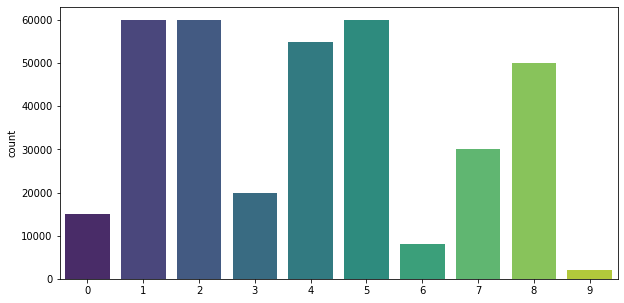

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(yres,palette='viridis')

In [26]:
from sklearn import model_selection
import time
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = model_selection.train_test_split(Xres,yres, test_size=0.20, random_state=42, stratify=yres)
start = time.time()
model_1 = LogisticRegression(solver='liblinear')
model_1.fit(X_train, y_train)
pred_1= model_1.predict(X_test)
score1 = model_1.score(X_test, y_test)
end = time.time()
print(end - start, "saniye\n")
print("Sampling Yapılmış Verinin Doğruluk Ortalaması: ",score1)
pred_2 = model_1.predict(xtest)
score2 = model_1.score(xtest,ytest)
print("Sampling Yapılmamış Verinin Doğruluk Ortalaması: ",score2)

136.5062985420227 saniye

Sampling Yapılmış Verinin Doğruluk Ortalaması:  0.8771111111111111
Sampling Yapılmamış Verinin Doğruluk Ortalaması:  0.9637855785665801


In [27]:
from sklearn.model_selection import KFold,StratifiedKFold,cross_val_score
model_1 = LogisticRegression(solver='liblinear')
model_1.fit(X_train,y_train)
score3 = cross_val_score(model_1, X_train, y_train)
print("Sampling Yapılmış Veride Cross Validation Doğruluk Ortalaması: ",score3.mean())

Sampling Yapılmış Veride Cross Validation Doğruluk Ortalaması:  0.8762777777777778


In [28]:
from sklearn.linear_model import LogisticRegression
logModel=LogisticRegression()
param_grid= [
             {'solver' : ['lbfgs'],'penalty' : ['l2'],'C':[1,5,25], 'max_iter' : [1000], 'n_jobs' : [100] }  ]

In [29]:
param_grid= [
             {'solver' : ['lbfgs'],'penalty' : ['l2'],'C':[1,5,25], 'max_iter' : [1000], 'n_jobs' : [100] }  ]

In [30]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(logModel, param_grid = param_grid, cv=3, verbose=3)
best_clf = clf.fit(X_train,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] C=1, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs ........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs, score=0.880, total= 3.2min
[CV] C=1, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs ........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.2min remaining:    0.0s


[CV]  C=1, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs, score=0.881, total= 2.9min
[CV] C=1, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs ........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  6.2min remaining:    0.0s


[CV]  C=1, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs, score=0.880, total= 3.3min
[CV] C=5, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs ........
[CV]  C=5, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs, score=0.890, total= 2.9min
[CV] C=5, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs ........
[CV]  C=5, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs, score=0.889, total= 3.2min
[CV] C=5, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs ........
[CV]  C=5, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs, score=0.888, total= 2.9min
[CV] C=25, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs .......
[CV]  C=25, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs, score=0.894, total= 3.4min
[CV] C=25, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs .......
[CV]  C=25, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs, score=0.895, total= 2.9min
[CV] C=25, max_iter=1000, n_jobs=100, penalty=l2, solver=lbfgs .......
[CV]  C=25, max_iter=1000,

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 28.0min finished


In [31]:
best_clf.best_score_

0.8926319444444445

In [32]:
best_clf.best_params_

{'C': 25, 'max_iter': 1000, 'n_jobs': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [33]:
start = time.time()
model_2 = LogisticRegression(C= 25, max_iter= 1000, n_jobs= 100, penalty='l2', solver= 'lbfgs')
model_2.fit(X_train, y_train)
pred_3= model_2.predict(X_test)
score5 = model_2.score(X_test, y_test)
end = time.time()
print(end - start, "seconds\n")
print("Sampling Yapılmış Verinin En İyi Parametrelerle Doğruluk Oranı: ",score5)

283.24129009246826 seconds

Sampling Yapılmış Verinin En İyi Parametrelerle Doğruluk Oranı:  0.8937916666666667


In [34]:
pred_5 = model_2.predict(xtest)
score7 = model_2.score(xtest,ytest)
print("Sampling Yapılmamış Verinin En İyi Parametrelerle Doğruluk Oranı: ",score7)

Sampling Yapılmamış Verinin En İyi Parametrelerle Doğruluk Oranı:  0.9684934942439121


In [35]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,pred_5))

              precision    recall  f1-score   support

           0       0.02      0.70      0.05       202
           1       1.00      0.94      0.97    195149
           2       1.00      1.00      1.00    189948
           3       0.03      0.74      0.06       300
           4       0.96      0.95      0.96    123183
           5       1.00      1.00      1.00    206620
           6       1.00      1.00      1.00        98
           7       0.46      0.69      0.55      3615
           8       0.82      0.74      0.78     14530
           9       0.28      1.00      0.44        13

    accuracy                           0.97    733658
   macro avg       0.66      0.88      0.68    733658
weighted avg       0.99      0.97      0.98    733658



In [36]:
print(confusion_matrix(ytest,pred_5))

[[   142     30      0     18      0      0      0      0     12      0]
 [  5816 183245     17    926   3744      0      0      2   1373     26]
 [     0      3 189944      0      0      0      0      1      0      0]
 [    53      3      0    223     20      0      0      1      0      0]
 [     5     32      0   5982 117100      0      0      3     61      0]
 [     0      3     45      0      5 206566      0      1      0      0]
 [     0      0      0      0      0      0     98      0      0      0]
 [     4     53      0     57    165      1      0   2499    836      0]
 [    32    397      2     61    367      0      0   2951  10713      7]
 [     0      0      0      0      0      0      0      0      0     13]]


In [38]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = model_selection.train_test_split(Xres,yres, test_size=0.20, random_state=42, stratify=yres)
start = time.time()
model_3 = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=5)
model_3.fit(X_train, y_train)
pred_10= model_3.predict(X_test)
score10 = model_3.score(X_test, y_test)
end = time.time()
print(end - start, "saniye\n")
print("Sampling Yapılmış Veride Doğruluk Oranı: ",score10)
pred_11 = model_3.predict(xtest)
score11 = model_3.score(xtest,ytest)
print("Sampling Yapılmamış Veride Doğruluk Oranı: ",score11)
score12 = cross_val_score(model_3, X_train, y_train)
print("Sampling Yapılmış Veride Cross Validation Doğruluk Ortalaması: ",score12.mean())

2.281830072402954 saniye

Sampling Yapılmış Veride Doğruluk Oranı:  0.8936666666666667
Sampling Yapılmamış Veride Doğruluk Oranı:  0.6853942845303943
Sampling Yapılmış Veride Cross Validation Doğruluk Ortalaması:  0.8920520833333333


In [39]:
param_grid= [{'criterion' : ['entropy','gini'],'splitter' : ['best','random'],'max_depth':[9,13,25]} ]
clf = GridSearchCV(DecisionTreeClassifier(), param_grid = param_grid, cv=3, verbose=3)
best_clf = clf.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] criterion=entropy, max_depth=9, splitter=best ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=entropy, max_depth=9, splitter=best, score=0.972, total=   2.0s
[CV] criterion=entropy, max_depth=9, splitter=best ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  criterion=entropy, max_depth=9, splitter=best, score=0.972, total=   2.0s
[CV] criterion=entropy, max_depth=9, splitter=best ...................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s


[CV]  criterion=entropy, max_depth=9, splitter=best, score=0.972, total=   2.0s
[CV] criterion=entropy, max_depth=9, splitter=random .................
[CV]  criterion=entropy, max_depth=9, splitter=random, score=0.927, total=   0.3s
[CV] criterion=entropy, max_depth=9, splitter=random .................
[CV]  criterion=entropy, max_depth=9, splitter=random, score=0.897, total=   0.3s
[CV] criterion=entropy, max_depth=9, splitter=random .................
[CV]  criterion=entropy, max_depth=9, splitter=random, score=0.917, total=   0.8s
[CV] criterion=entropy, max_depth=13, splitter=best ..................
[CV]  criterion=entropy, max_depth=13, splitter=best, score=0.998, total=   5.4s
[CV] criterion=entropy, max_depth=13, splitter=best ..................
[CV]  criterion=entropy, max_depth=13, splitter=best, score=0.998, total=   2.9s
[CV] criterion=entropy, max_depth=13, splitter=best ..................
[CV]  criterion=entropy, max_depth=13, splitter=best, score=0.998, total=   2.5s
[CV] 

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   42.8s finished


In [40]:
best_clf.best_score_

0.9993784722222222

In [41]:
best_clf.best_params_

{'criterion': 'entropy', 'max_depth': 25, 'splitter': 'best'}

In [48]:
start = time.time()
model_4 = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=25)
model_4.fit(X_train, y_train)
pred_12= model_4.predict(X_test)
score14 = model_4.score(X_test, y_test)
end = time.time()
print(end - start, "saniye\n")
print("En İyi Parametrelerle Sampling Yapılmış Veride Doğruluk Oranı: ",score14)
pred_14 = model_4.predict(xtest)
score15 = model_4.score(xtest,ytest)
print("En İyi Parametrelerle Sampling Yapılmamış Veride Doğruluk Oranı:", score15) 

3.1295816898345947 saniye

En İyi Parametrelerle Sampling Yapılmış Veride Doğruluk Oranı:  0.9996111111111111
En İyi Parametrelerle Sampling Yapılmamış Veride Doğruluk Oranı: 0.7806593808014088


In [44]:
print(classification_report(y_test,pred_12))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3000
           1       1.00      1.00      1.00     12000
           2       1.00      1.00      1.00     12000
           3       1.00      1.00      1.00      4000
           4       1.00      1.00      1.00     11000
           5       1.00      1.00      1.00     12000
           6       1.00      1.00      1.00      1600
           7       1.00      1.00      1.00      6000
           8       1.00      1.00      1.00     10000
           9       1.00      1.00      1.00       400

    accuracy                           1.00     72000
   macro avg       1.00      1.00      1.00     72000
weighted avg       1.00      1.00      1.00     72000



In [45]:
print(confusion_matrix(y_test,pred_12))

[[ 3000     0     0     0     0     0     0     0     0     0]
 [    0 11994     0     0     5     0     0     1     0     0]
 [    0     0 12000     0     0     0     0     0     0     0]
 [    0     0     0  4000     0     0     0     0     0     0]
 [    0     2     0     0 10998     0     0     0     0     0]
 [    0     0     0     0     0 12000     0     0     0     0]
 [    0     0     0     0     0     0  1600     0     0     0]
 [    0     0     0     0     0     0     0  5994     6     0]
 [    0     2     0     0     0     0     0    17  9981     0]
 [    0     0     0     0     0     0     0     0     0   400]]
